In [15]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


In [152]:
h1 = np.genfromtxt('../../Python/output_data_paper/donor_entropy_approx21plusco56_normalhelium.dat',skip_header=1)
h2 = np.genfromtxt('../entropy_normal_2.0_HELM.dat',skip_header=0)


(0.62, 0.64)

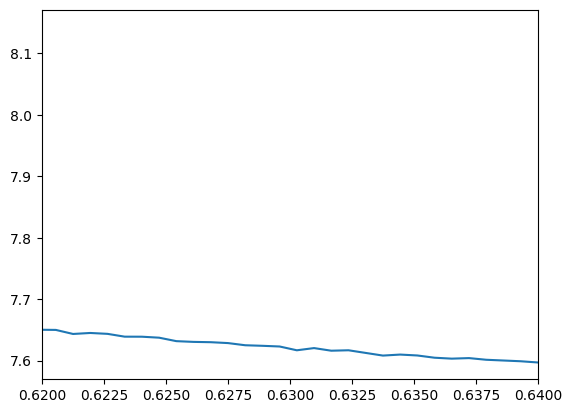

In [135]:
plt.plot((1-h1[:,0])*0.64,np.log10(h1[:,2]))
plt.xlim(0.62,0.64)


In [136]:
h1[10:26,2]=1e7+(h1[25,2]-1e7)*(h1[7,0]-h1[10:26,0])/(h1[10,0]-h1[25,0])

In [153]:
h2[943:,1]=h2[943,1]

In [151]:
np.where(h2[:,0]*0.64>=0.623)

(array([943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955,
        956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968,
        969]),)

In [101]:
(1-h1[7:25,0])*0.64

array([0.63514104, 0.63444692, 0.63375273, 0.63305858, 0.63236444,
       0.63167025, 0.63097615, 0.63028205, 0.62958788, 0.62889373,
       0.62819962, 0.62750546, 0.62681127, 0.62611719, 0.62542302,
       0.62472886, 0.62403475, 0.62334058])

(0.62, 0.64)

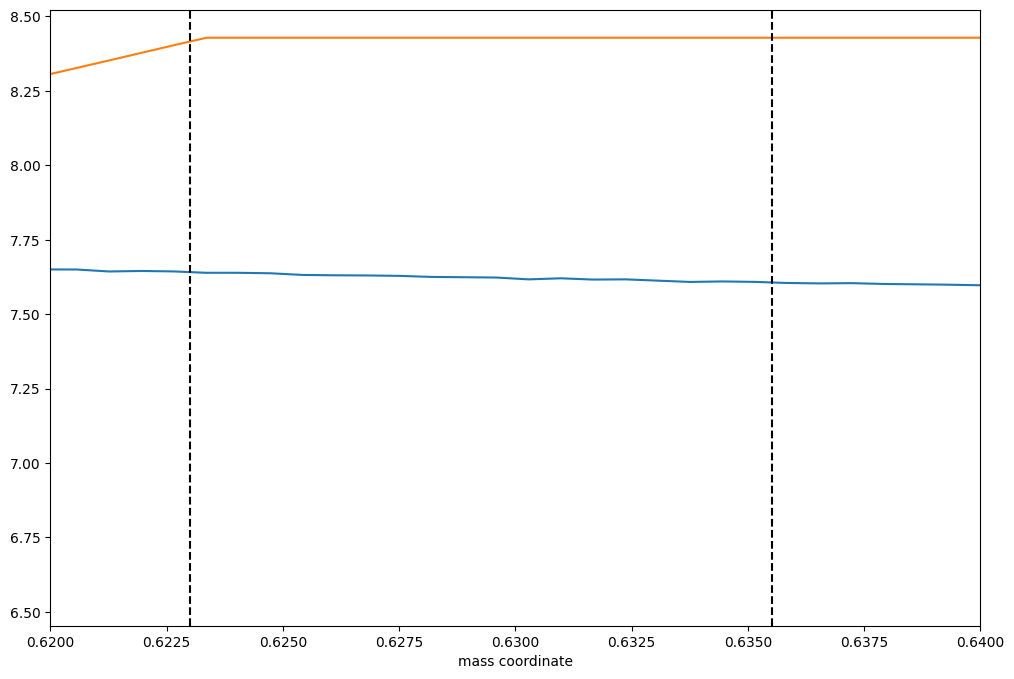

In [154]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot((1-h1[:,0])*0.64,np.log10(h1[:,2]))
ax.plot((h2[:,0])*0.64,np.log10(h2[:,1]))
ax.axvline(x=0.623,color='black',linestyle='--')
ax.axvline(x=h2[962,0]*0.64,color='black',linestyle='--')
plt.xlabel("mass coordinate")
plt.xlim(0.62,0.64)



In [122]:
h1[6,2]

10000000.0

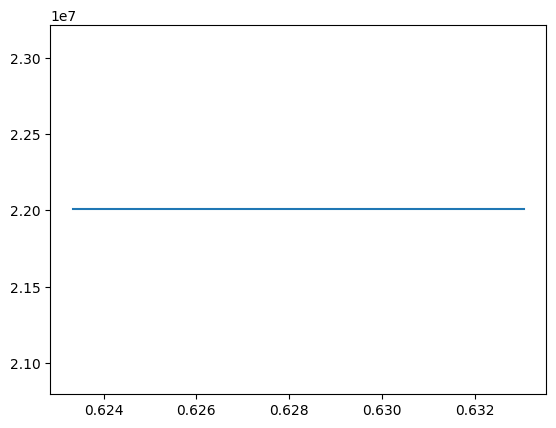

In [78]:
plt.plot((1-h1[10:25,0])*0.64,h1[10:25,2])


In [87]:
np.argmax((h2[:,1]))

962

In [155]:
def create_interpolation_function(original_m, original_entropy):
    interpolation_function = interp1d(original_m, original_entropy, kind='linear', fill_value="extrapolate")
    return interpolation_function

In [156]:
#Interpolating functions for entropy using older mass coordinates
entropy=create_interpolation_function((h2[:,0])*0.64,h2[:,1])
temp=create_interpolation_function((1.000-h1[:,0])*0.64,h1[:,2]/1e7)


In [157]:
new_m = np.linspace(0., 0.64, 970)  #New mass coordinate range



In [158]:
#New entropies
new_entropy = entropy(new_m)
new_temp = temp(new_m)


In [160]:
from scipy.signal import savgol_filter
new_temp_smooth=savgol_filter(new_temp,31,3)  #Smoothing the difference of entropies

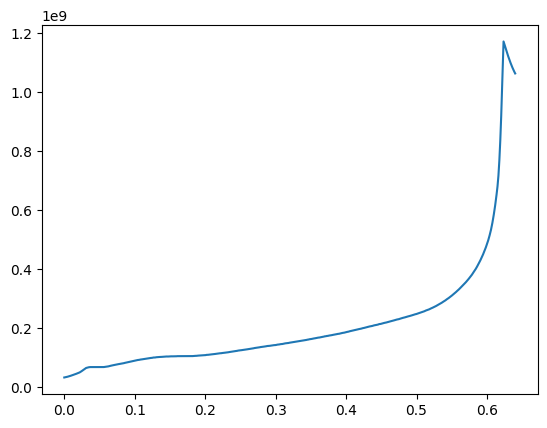

In [161]:
plt.plot(new_m,new_temp_smooth*new_entropy)


In [162]:
rescaled_entropy=new_temp_smooth*new_entropy  #The rescaled new entropy

In [163]:
q_zones=1-new_m/0.64
q_zones=q_zones/q_zones.max()
print(q_zones)







[1.         0.99896801 0.99793602 0.99690402 0.99587203 0.99484004
 0.99380805 0.99277606 0.99174407 0.99071207 0.98968008 0.98864809
 0.9876161  0.98658411 0.98555212 0.98452012 0.98348813 0.98245614
 0.98142415 0.98039216 0.97936017 0.97832817 0.97729618 0.97626419
 0.9752322  0.97420021 0.97316821 0.97213622 0.97110423 0.97007224
 0.96904025 0.96800826 0.96697626 0.96594427 0.96491228 0.96388029
 0.9628483  0.96181631 0.96078431 0.95975232 0.95872033 0.95768834
 0.95665635 0.95562436 0.95459236 0.95356037 0.95252838 0.95149639
 0.9504644  0.9494324  0.94840041 0.94736842 0.94633643 0.94530444
 0.94427245 0.94324045 0.94220846 0.94117647 0.94014448 0.93911249
 0.9380805  0.9370485  0.93601651 0.93498452 0.93395253 0.93292054
 0.93188854 0.93085655 0.92982456 0.92879257 0.92776058 0.92672859
 0.92569659 0.9246646  0.92363261 0.92260062 0.92156863 0.92053664
 0.91950464 0.91847265 0.91744066 0.91640867 0.91537668 0.91434469
 0.91331269 0.9122807  0.91124871 0.91021672 0.90918473 0.9081

In [164]:
combined_array = np.column_stack((np.flipud(q_zones),rescaled_entropy))
dat_file_path = '../rescaled_constant_entropy_normal_2.0_HELM.dat'
np.savetxt(dat_file_path, combined_array, delimiter='\t', header='qm\theat', comments='')